In [343]:
import numpy as np

In [372]:
file_name='../log/log_12_05_02_54'
with open(file_name) as f:
    lines = f.readlines()

In [373]:
count = []
for i,l in enumerate(lines):
    if 'Step 500' in l:
        for j in lines[i+16+1][2:-3].split('.'):
            count.append( int(j.strip()) )
        break

In [374]:
np.argsort(count)

array([ 0, 25, 26, 27, 28, 29, 30, 31, 32, 24, 33, 35, 36, 37, 38, 39, 40,
       42, 43, 34, 44, 22, 20,  1,  2,  3,  4,  5,  6,  7,  8,  9, 21, 10,
       12, 13, 14, 16, 18, 11, 45, 17, 15, 19, 23, 41])

In [375]:
count

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 1,
 0,
 12,
 0,
 0,
 0,
 29,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 379,
 0,
 0,
 0,
 0]

In [379]:
from matplotlib import pyplot as plt
% matplotlib inline


train_ls=[];val_ls=[];step=[]; acc_t=[]; acc_v=[]
for l in lines:
    if 'DEBUG' in l:
        pos_l = l.find('VAL loss/acc:') + 14
        pos_r = l[pos_l:].find('/')
        val_ls.append( float(l[pos_l:][:pos_r]) )
        
        pos_l = l.find('Minibatch loss/acc:') + 20
        pos_r = l[pos_l:].find('/')
        train_ls.append( float(l[pos_l:][:pos_r]) )

        pos_l = l.find('Step')+5
        pos_r = l[pos_l:].find(':')
        step.append(  int(l[pos_l:][:pos_r]) )
        
        acc_t.append(float(l.split('/')[2].split(',')[0]))
        acc_v.append(float(l.split('/')[-1].strip()))
        
        print 'step %d, train/val loss: %f/%f, train/val acc: %f/%f'%(step[-1], train_ls[-1],val_ls[-1],acc_t[-1],acc_v[-1])
        #if step[-1] == 10000:
        #    break

step 0, train/val loss: 0.579378/0.693832, train/val acc: 0.070000/0.035106
step 100, train/val loss: 0.534455/0.680389, train/val acc: 0.010000/0.033191
step 200, train/val loss: 0.491962/0.552477, train/val acc: 0.210000/0.144043
step 300, train/val loss: 0.185912/0.481282, train/val acc: 0.060000/0.060213
step 400, train/val loss: 0.364491/0.575366, train/val acc: 0.030000/0.194468
step 500, train/val loss: 0.061547/0.734223, train/val acc: 0.260000/0.181064
step 600, train/val loss: 0.264041/0.740980, train/val acc: 0.120000/0.284043
step 700, train/val loss: 0.156586/0.875987, train/val acc: 0.410000/0.267660
step 800, train/val loss: 0.113135/0.784352, train/val acc: 0.400000/0.285532
step 900, train/val loss: 0.181121/0.815695, train/val acc: 0.300000/0.324468
step 1000, train/val loss: 0.099703/0.850750, train/val acc: 0.630000/0.312128
step 1100, train/val loss: 0.104360/0.888015, train/val acc: 0.300000/0.320426
step 1200, train/val loss: 0.111093/0.874049, train/val acc: 0.5

Text(0.5,1,u'Model response to dataset size')

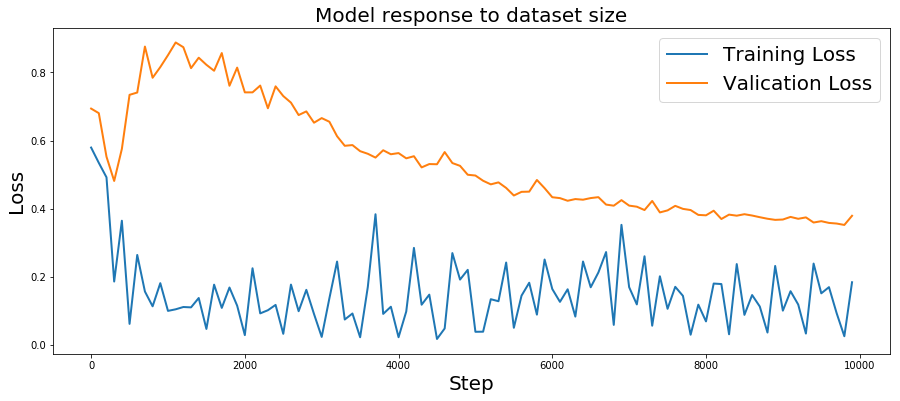

In [377]:
fig=plt.figure(figsize=(15,6))
plt.plot(step,train_ls,lw=2)
plt.plot(step,val_ls,lw=2)
plt.legend(['Training Loss','Valication Loss'],fontsize=20)
plt.xlabel('Step',fontsize=20)
plt.ylabel('Loss',fontsize=20)
plt.title('Model response to dataset size',fontsize=20)

Text(0.5,1,u'Model response to dataset size')

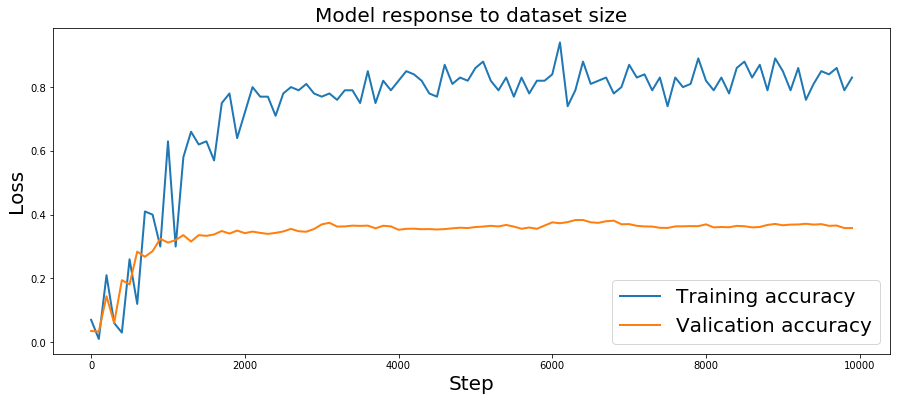

In [378]:
fig=plt.figure(figsize=(15,6))
plt.plot(step,acc_t,lw=2)
plt.plot(step,acc_v,lw=2)
plt.legend(['Training accuracy','Valication accuracy'],fontsize=20)
plt.xlabel('Step',fontsize=20)
plt.ylabel('Loss',fontsize=20)
plt.title('Model response to dataset size',fontsize=20)